In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt

In [2]:
#1622
#User 564
#Reading users file:
u_cols = ['user_id','age','sex','occupation','zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', \
                    names=u_cols,encoding='latin-1')

valid_users = [564, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 588, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 649, 651, 652, 653, 654, 656, 657, 658, 659, 660, 661, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 677, 678, 679, 680, 681, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 700, 701, 702, 703, 704, 705, 706, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 728, 729, 730, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 748, 749, 750, 752, 753, 754, 755, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 783, 784, 785, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 829, 830, 831, 832, 834, 836, 837, 838, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 852, 853, 855, 856, 857, 858, 859, 860, 861, 862, 864, 865, 866, 867, 868, 869, 871, 872, 873, 874, 875, 876, 877, 878, 879, 881, 882, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 895, 897, 898, 899, 900, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 917, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943]

#Reading ratings file:
r_cols = ['user_id','movie_id','rating','unix_timestamp']
rating = pd.read_csv('ml-100k/u.data',sep='\t',names=r_cols,\
                     encoding='latin-1')

#Reading the movie file:
item_cols = ['movie_id','movie title','release date',
'video release date','IMDb URL','unknown','Action',
'Adventure','Animation','Childrens','Comedy','Crime',
'Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance ','Sci-Fi','Thriller',
'War' ,'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|',names=item_cols,\
                   encoding='latin-1')
movies_prof = movies[['movie_id','movie title','release date']].copy()
movies_prof1 = movies_prof.copy()
print(movies_prof1.head())
movies_prof1['release date'] = pd.to_datetime(movies_prof1['release date'])
movies_prof1 = movies_prof1.sort_values(['release date'])
#print(movies_prof1)
profit = pd.DataFrame(columns=['movie_id','Profit'])
print("Here")
print(movies_prof1.head())
early = int(str(movies_prof1['release date'])[7:11])
print("Earliest Year: ", early)
for j,i in zip(movies_prof1['movie_id'],movies_prof1['release date']):
    date = str(i)
    if(date == 'NaT'):
        sum = 0
    else:
        #print(date[:4],date[5:7],date[8:10])
        year = int(date[:4])
        sum = year + int(date[5:7])*10 + int(date[8:10])
        tot = year - early
        sum+= (tot/5)*100
        sum+=(tot/10)*1000
        #print(year)
        sum+=(tot/50)*10000
        #print(sum)
        sum1 = pd.DataFrame([[j,sum]],columns=['movie_id','Profit'])
    profit = profit.append(sum1)
#print(profit)
movies_prof2 = pd.merge(profit,movies_prof1)
#print(movies_prof2.head())

   movie_id        movie title release date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995
Here
      movie_id                                        movie title release date
674        675  Nosferatu (Nosferatu, eine Symphonie des Graue...   1922-01-01
1541      1542                         Scarlet Letter, The (1926)   1926-01-01
616        617          Blue Angel, The (Blaue Engel, Der) (1930)   1930-01-01
655        656                                           M (1931)   1931-01-01
1123      1124                         Farewell to Arms, A (1932)   1932-01-01
Earliest Year:  1922


In [5]:
print(rating.head())
df2  = rating.copy()

df2.head()

groups = df2.groupby("user_id", as_index=False)
k = 0
columns = ['user_id','age','sex','movie_id']
#print(users)
df_users = pd.DataFrame(columns=columns)
#print(df_user)
for group in groups:
    toy_stor = group
    toy_story = toy_stor[1].copy()
    #print((toy_story) )
    movie_num = toy_story['movie_id'].iloc[0]
    users_rating = users.copy()
    df_1_toy = users.copy()
    df_1_toy.occupation.unique()

    user_movie = pd.merge(df_1_toy,toy_story)
    #print("Sigh\n",user_movie)
    

    #user_movie = user_movie.drop(['unix_timestamp','rating','zip_code'],axis=1)
    #print(user_movie.head())
    user_movie = user_movie.loc[user_movie['rating'] >= 3]
    #print(user_movie.head())
    user_movie = user_movie.drop(['unix_timestamp','rating','zip_code','occupation'],axis=1)
    
    df_users = df_users.append(user_movie)
        
    k+=1

print("right here")
df_users = df_users.reset_index(drop=True)
size = df_users.loc[df_users['user_id'] < 564].shape[0]
df_users = df_users[:size].copy()
df_users.sex.replace(['M', 'F'], [1, 0], inplace=True)
print(df_users)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
right here
      user_id age  sex movie_id
0           1  24    1       61
1           1  24    1      189
2           1  24    1       33
3           1  24    1      160
4           1  24    1       20
5           1  24    1      202
6           1  24    1      171
7           1  24    1      265
8           1  24    1      117
9           1  24    1       47
10          1  24    1      222
11          1  24    1      253
12          1  24    1      113
13          1  24    1      227
14          1  24    1       17
15          1  24    1       90
16          1  24    1       64
17          1  24    1       92
18          1  24    1      228
19          1  24    1      121
20          1  24    1      114
21          1  

In [6]:
print(df_users.loc[df_users['user_id'] > 0].shape[0])
print(df_users.loc[df_users['movie_id'] == 50].shape[0],"Star Wars")
print(df_users.loc[df_users['movie_id'] == 181].shape[0],"Return Jedi")
print(df_users.loc[df_users['movie_id'] == 1].shape[0],"Toy Story")
print(df_users.loc[df_users['movie_id'] == 172].shape[0],"Empire Strike Back")
print(df_users.loc[df_users['movie_id'] == 257].shape[0],"Men in Black")

52394
338 Star Wars
291 Return Jedi
245 Toy Story
208 Empire Strike Back
166 Men in Black


In [7]:
labels_train = df_users[['movie_id','user_id']].copy()
labels_train = labels_train.set_index('user_id')
#print(labels_train.head())
print("\nlabels_train\n")
print(labels_train.head())
print("sort:")
labels_train = pd.Series(df_users['movie_id'].values,\
                         index=df_users['user_id'])
labels_train = labels_train.rename("movie_id")
labels_train= labels_train.\
apply(pd.to_numeric, errors='coerce')
labels_train = labels_train.sort_values()
print(labels_train.head())
df_user = df_users.copy()
df_user = df_user.sort_values(by=['movie_id'])
df_user = df_user.drop(['movie_id'],axis=1)
#print(df_users.set_index('user_id'))
#df_users = df_users.set_index('user_id')
print(df_user)
print("here")
print("Labels size",len(labels_train))
#print(labels_train.loc[labels_train['movie_id'] == 586].shape[0])
print(df_user.head())
df_user = df_user.set_index('user_id')
print(df_user.head())


labels_train

        movie_id
user_id         
1             61
1            189
1             33
1            160
1             20
sort:
user_id
340    1
65     1
493    1
445    1
291    1
Name: movie_id, dtype: int64
      user_id age  sex
30753     340  46    1
5920       65  51    0
45714     493  22    1
40909     445  21    1
24275     291  19    1
38939     422  26    1
40159     435  24    1
11329     130  20    1
19777     247  28    1
20527     256  35    0
8238       92  32    1
1687       13  47    1
23234     280  30    0
35431     390  42    0
30598     339  35    1
35387     389  44    0
16387     203  25    0
4466       54  22    1
6848       82  50    1
16372     202  41    0
43410     467  29    1
13171     160  27    1
51172     550  16    0
39957     434  16    0
8967       97  43    1
11386     131  59    0
36922     402  30    1
47701     514  27    1
16711     209  33    0
10550     121  54    1
...       ...  ..  ...
44987     486  39    1
48022     519  22  

In [8]:
#print(df_users.occupation.unique())
#print(len(labels_train['movie_id'].unique()))
movies1 = labels_train.unique()
#print(len(movies1) )
#print((movies1) )
#print(type(movies1))
movies1 = movies1.tolist()
#print(movies1[:10])

In [9]:
GNB = MultinomialNB()
t0 = time()
print(labels_train.head())
print(labels_train.tail())
print(df_user.head())
print(df_user.tail())
GNB.fit(df_user,labels_train)

user_id
340    1
65     1
493    1
445    1
291    1
Name: movie_id, dtype: int64
user_id
500    1616
519    1617
543    1619
552    1620
550    1620
Name: movie_id, dtype: int64
        age  sex
user_id         
340      46    1
65       51    0
493      22    1
445      21    1
291      19    1
        age  sex
user_id         
500      28    1
519      22    1
543      33    1
552      45    1
550      16    0


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
#for i in [563,566,567,568]:
#print(movies1[:10])
movies_sort = movies1
#print(movies_sort[:11])
movies_sort.sort()
#print(movies_sort[:11])
genre = ['release date','video release date','IMDb URL','unknown','Action',\
            'Adventure','Animation','Childrens','Comedy','Crime',\
            'Documentary','Drama','Fantasy','Film-Noir','Horror',\
            'Musical','Mystery','Romance ','Sci-Fi','Thriller',\
            'War' ,'Western']
print("Movies sorted",len(movies_sort))
tot_prob = [0,0,0,0,0]
tot_prof = [0,0,0,0,0]
#print(tot_prob)
#print(tot_prof)
#for i in [563,566,567]:
#for i in range(563,943):
#for i in valid_users:
for i in [563,565,568]:
    #i-=1
    #print("yeah")
    df_sugg = pd.DataFrame(columns = ['user_id','age','sex'])
    df_user = users.iloc[i].copy()
    df_user = df_user.drop(['occupation','zip_code'], axis=0)
    print(df_user)
    #print(type(df_user))
    #df_user = df_user.set_index('user_id')
    if(df_user['sex'] == 'M'):
        df_user['sex'] = 1
    else:
        df_user['sex'] = 0
    df_sugg = df_sugg.append(df_user)
    #print(df_sugg)
    df_sugg = df_sugg.set_index('user_id')
    nb_pred = GNB.predict(df_sugg)
    approx_pred = GNB.predict_proba(df_sugg)
    proba = approx_pred[0].copy()
    proba1 = proba.copy()
    #print(proba)
    #print(type(proba))
    if(i== 563):
        print(df_sugg)
    list1 = [j for j in range(1,1622)]
    mov = pd.DataFrame(proba,columns=['Probability'])
    mov['movie_id'] = None
    for j in range(1,1622):
        mov.loc[j-1,'movie_id'] = j
    mov = mov.sort_values(['Probability'],ascending=False)
    combine = pd.merge(mov,movies_prof2,how='outer')
    combine = combine.drop('release date',axis=1)
    #print(combine)
    y=0
    if(i == 600 or i == 700 or i ==800 or i == 900):
        print(df_sugg)
    combine['R_y'] = combine['Profit'] * combine['Probability']
    print(combine[:15])
    #print("\n\n\n")
    m = 0
    for x in (0,0.25,0.5,0.75,1):
        final = combine.copy()
        #print("\n\n\n")
        #print("alpha: ", x)
        #if(x == 0):
        #    print("Customer Focused:")
        #if(x == 1):
        #    print("Company Focused:")
        #if(x == 0.5):
        #    print("Midway:")
        
        final['F_y'] = final['Profit'].pow(x) * final['Probability']
        final = final.sort_values(['F_y'],ascending=False)
        final = final.dropna()
        final = final.reset_index(drop=True)
        max1 = final['Probability'].max()
        min1 = final['Probability'].min()
        normal = (final['Probability'][0] - min1) / (max1-min1)
        tot_prob[m]+=normal
        
        #print("What")
        max1 = final['Profit'].max()
        min1 = final['Profit'].min()
        #print("Max value:",final['Profit'].max())
        #print("Min value:",final['Profit'].min())
        normal = (final['Profit'][0] - min1) / (max1-min1)
        #print(final['Profit'][0])
        #print("Normalization: ",normal)
        tot_prof[m]+=normal
        #print(len(final['Profit']))
        #print(final[:15])
        #print(final.tail())
        #print(tot_prof)
        #print(tot_prob)
        m+=1
    #print("\n")
    #print(tot_prob)
    #print("NEW USER!!!!")

Movies sorted 1483
user_id    564
age         65
sex          M
Name: 563, dtype: object
        age sex
user_id        
564      65   1
    Probability  movie_id   Profit                       movie title  \
0      0.006620      50.0  19588.0                  Star Wars (1977)   
1      0.006250     100.0  26031.0                      Fargo (1996)   
2      0.005635     180.0  20230.0             Apocalypse Now (1979)   
3      0.005479     257.0  26071.0               Men in Black (1997)   
4      0.004967     285.0  25780.0             Secrets & Lies (1996)   
5      0.004853      98.0  24082.0  Silence of the Lambs, The (1991)   
6      0.004741       1.0  25366.0                  Toy Story (1995)   
7      0.004677     173.0  22798.0        Princess Bride, The (1987)   
8      0.004661     287.0  25814.0              Marvin's Room (1996)   
9      0.004618     126.0  25772.0        Spitfire Grill, The (1996)   
10     0.004512     299.0  26099.0                    Hoodlum (1997)   

In [34]:
print(df_sugg)

        age sex
user_id        
943      22   1


In [35]:
avg_suit = tot_prob.copy()
print(avg_suit)
length = len(valid_users)
avg_suit = [i/length for i in avg_suit]
print(avg_suit)
avg_prof = tot_prof.copy()
avg_prof = [i/length for i in avg_prof]
print(avg_prof)

[341.0, 336.04837171964857, 315.77207131333506, 315.77207131333506, 315.7363850241494]
[1.0, 0.9854790959520486, 0.9260178044379327, 0.9260178044379327, 0.9259131525634879]
[0.7345021578925517, 0.8077977530348611, 0.982153651904672, 0.982153651904672, 0.9822918556248529]


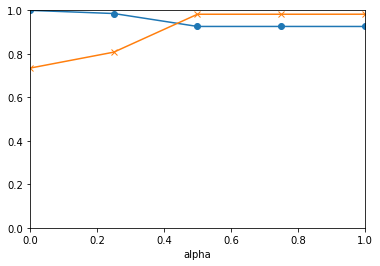

In [37]:
plt.plot([0,0.25,0.5,0.75,1],avg_suit,'-o')
plt.plot([0,0.25,0.5,0.75,1], avg_prof, '-x')
plt.axis([0,1,0,1])
plt.xlabel('alpha')
plt.show()

In [18]:
groups = df2.groupby("user_id", as_index=False)
#print(movies1)
k=1
user_num=0
index = user_num
print(len(movies1))
valid_users = []
for group in groups:
    #print(group)
    #print(len(group))
    if(k == 564 or k == 566 or k == 567):
    #if(k > 563):
        #print("User_num: ",group[0])
        toy_stor = group
        #print(toy_stor)
        toy_story = toy_stor[1].copy()
        #print(toy_story['movie_id'].tolist())
        #print(movies1)
        if(set(toy_story['movie_id'].tolist()).issubset(movies1) == False):
            index+=1 
            k+=1
            #print("sigh")
            temp = toy_story['movie_id'].tolist()
            temp.sort()
            #print(temp)
            #print(set(toy_story['movie_id'].tolist()).issubset(movies1))
            continue
        #print(set(toy_story['movie_id'].tolist()).issubset(movies1))
        else:
            #print(movies1)
            valid_users.append(group[0])
            #print(movies1.sort())
            #print(toy_story)
            df_user1 = toy_story.copy()
            df_user1.sort_values("rating", inplace=True,ascending=False)
            #print("here")
            #print(df_user1)
            movie_user1 = pd.merge(df_user1,movies)
            movie_user1 = movie_user1.drop(genre,axis=1)
            movie_user2 = movie_user1.copy()
            movie_user2 = movie_user2.sort_values("rating",ascending=False)
            movie_user2 = movie_user2.reset_index(drop=True)

            #print(len(movie_user2))
            #print(len(movie_user2.loc[movie_user1['rating'] >= 3]))
            print("*"*40,"Actual User Rating","*"*40)
            print("User_num:",group[0])
            #print("\n")
            for i in range(len(movie_user2)):
                print(movie_user2['movie_id'][i],\
                      movie_user2['movie title'][i],\
                      movie_user2['rating'][i])
                j=0
    k+=1
    #if(k == 567):
    #    break
print(valid_users)

1483
**************************************** Actual User Rating ****************************************
User_num: 564
181 Return of the Jedi (1983) 4
289 Evita (1996) 4
300 Air Force One (1997) 4
121 Independence Day (ID4) (1996) 4
472 Dragonheart (1996) 4
257 Men in Black (1997) 4
344 Apostle, The (1997) 4
258 Contact (1997) 4
597 Eraser (1996) 4
345 Deconstructing Harry (1997) 4
50 Star Wars (1977) 4
292 Rosewood (1997) 4
313 Titanic (1997) 4
245 Devil's Own, The (1997) 4
117 Rock, The (1996) 4
118 Twister (1996) 4
127 Godfather, The (1972) 4
298 Face/Off (1997) 3
323 Dante's Peak (1997) 3
333 Game, The (1997) 3
930 Chain Reaction (1996) 3
312 Midnight in the Garden of Good and Evil (1997) 3
1034 Quest, The (1996) 3
831 Escape from L.A. (1996) 3
827 Daylight (1996) 3
272 Good Will Hunting (1997) 3
750 Amistad (1997) 3
685 Executive Decision (1996) 3
281 River Wild, The (1994) 3
302 L.A. Confidential (1997) 3
924 White Squall (1996) 3
1025 Fire Down Below (1997) 2
1016 Con Air (1997